1. learn.lr_find
2. working with tabular data
3. preprocessing

In [1]:
from google.colab import files
files.upload()  # Upload the kaggle.json file here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"surajjha96","key":"fbbbdadb1d757ce8e7a20bfdf79bdc5c"}'}

In [2]:
!pip install kaggle
!mkdir -p /root/.config/kaggle
!mv kaggle.json /root/.config/kaggle/
!chmod 600 /root/.config/kaggle/kaggle.json

In [3]:
import os
from pathlib import Path
import torch, numpy as np, pandas as pd
np.set_printoptions(linewidth=100)
torch.set_printoptions(linewidth=100, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 100)

In [4]:
path = Path('titanic')
if not path.exists():
    import zipfile,kaggle
    kaggle.api.competition_download_cli(str(path))
    zipfile.ZipFile(f'{path}.zip').extractall(path)

In [5]:
df = pd.read_csv(path/'train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.shape,df.describe()

((891, 12),
        PassengerId    Survived      Pclass         Age       SibSp       Parch        Fare
 count   891.000000  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
 mean    446.000000    0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
 std     257.353842    0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
 min       1.000000    0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
 25%     223.500000    0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
 50%     446.000000    0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
 75%     668.500000    1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
 max     891.000000    1.000000    3.000000   80.000000    8.000000    6.000000  512.329200)

In [7]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
modes = df.mode().iloc[0]
df.fillna(modes, inplace=True)

In [9]:
df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

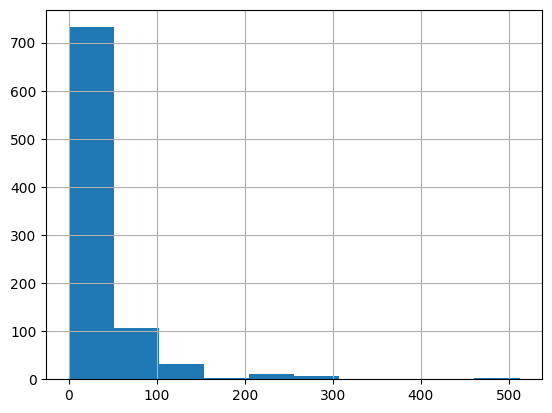

In [10]:
df['Fare'].hist()

In [11]:
df['LogFare'] = np.log(df['Fare']+1)

<Axes: >

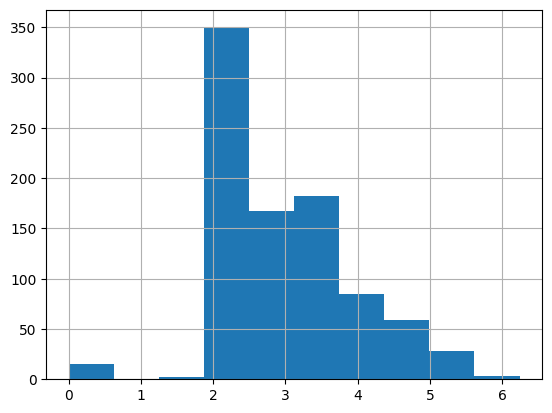

In [12]:
df['LogFare'].hist()

In [13]:
df['Pclass'].unique()

array([3, 1, 2])

In [14]:
df.describe(include=[object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,1601,B96 B98,S
freq,1,577,7,691,646


In [15]:
df.groupby('Ticket').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,LogFare
Ticket,,,,,,,,,,,,
110152,3,3,3,3,3,3,3,3,3,3,3,3
110413,3,3,3,3,3,3,3,3,3,3,3,3
110465,2,2,2,2,2,2,2,2,2,2,2,2
110564,1,1,1,1,1,1,1,1,1,1,1,1
110813,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
W./C. 6608,4,4,4,4,4,4,4,4,4,4,4,4
W./C. 6609,1,1,1,1,1,1,1,1,1,1,1,1
W.E.P. 5734,1,1,1,1,1,1,1,1,1,1,1,1


In [24]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'LogFare'],
      dtype='object')

In [26]:
for col in df.columns:
  print(col,len(df[col].unique()))

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 88
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 147
Embarked 3
LogFare 248


In [31]:
df = pd.get_dummies(df,columns=["Sex","Pclass","Embarked"])

In [32]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'LogFare', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [33]:
import torch

In [66]:
t_dep = torch.tensor(df['Survived'])

In [70]:

indep_cols = ['Age', 'SibSp', 'Parch', 'LogFare','Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C',
       'Embarked_Q', 'Embarked_S']

t_indep  = torch.tensor(df[indep_cols].astype('float32').values)

In [71]:
t_indep .shape,t_dep.shape

(torch.Size([891, 12]), torch.Size([891]))

In [52]:
torch.manual_seed(442)

In [72]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep / vals

In [73]:
n_coeff = t_indep.shape[1] #features

In [74]:
coeffs = torch.rand(n_coeff)-0.5
coeffs

tensor([-0.0044, -0.1304, -0.0837,  0.0235,  0.3648,  0.1559, -0.1775, -0.2056, -0.1238, -0.1933,
         0.4496,  0.2648])

In [77]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)
def calc_loss(coeffs, indeps, deps):
  return torch.abs(calc_preds(coeffs, indeps)-deps).mean()
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()
def acc(coeffs):
  return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()
def show_coeffs():
  return dict(zip(indep_cols, coeffs.requires_grad_(False)))

In [80]:
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]
len(trn_indep),len(val_indep),len(trn_dep),len(val_dep)

(713, 178, 713, 178)

In [81]:
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")
def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [88]:
coeffs = train_model(lr=1.4)
acc(coeffs)

0.544; 0.533; 0.521; 0.503; 0.483; 0.459; 0.429; 0.394; 0.358; 0.327; 0.302; 0.284; 0.271; 0.261; 0.253; 0.246; 0.242; 0.238; 0.234; 0.231; 0.229; 0.227; 0.226; 0.224; 0.223; 0.222; 0.220; 0.219; 0.218; 0.218; 

tensor(0.7921)

In [118]:
def get_test_results():
  tst_df = pd.read_csv(path/'test.csv')
  tst_df['Fare'] = tst_df.Fare.fillna(0)
  tst_df.fillna(modes, inplace=True)
  tst_df['LogFare'] = np.log(tst_df['Fare']+1)
  tst_df = pd.get_dummies(tst_df, columns=["Sex","Pclass","Embarked"])

  tst_indep = torch.tensor(tst_df[indep_cols].astype('float32').values, dtype=torch.float)
  tst_indep = tst_indep / vals
  tst_df['Survived'] = (calc_preds(coeffs,tst_indep)>0.5).int()
  sub_df = tst_df[['PassengerId','Survived']]
  sub_df.to_csv('sub.csv', index=False)

In [91]:
sub_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [113]:
def init_coeffs():
    hiddens = [5, 3]
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

In [114]:
def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [115]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [116]:
coeffs = train_model(lr=4)

0.586; 0.492; 0.465; 0.426; 0.389; 0.435; 0.427; 0.420; 0.414; 0.408; 0.400; 0.332; 0.336; 0.349; 0.250; 0.244; 0.236; 0.225; 0.219; 0.214; 0.211; 0.208; 0.205; 0.203; 0.201; 0.200; 0.199; 0.198; 0.197; 0.196; 

In [117]:
acc(coeffs)

tensor(0.8258)

In [119]:
get_test_results()

In [120]:
# do same using fastai library

In [121]:
from fastai.tabular.all import *

pd.options.display.float_format = '{:.2f}'.format
set_seed(42)

In [122]:
df = pd.read_csv(path/'train.csv')
def add_features(df):
    df['LogFare'] = np.log1p(df['Fare'])
    df['Deck'] = df.Cabin.str[0].map(dict(A="ABC", B="ABC", C="ABC", D="DE", E="DE", F="FG", G="FG"))
    df['Family'] = df.SibSp+df.Parch
    df['Alone'] = df.Family==0
    df['TicketFreq'] = df.groupby('Ticket')['Ticket'].transform('count')
    df['Title'] = df.Name.str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
    df['Title'] = df.Title.map(dict(Mr="Mr",Miss="Miss",Mrs="Mrs",Master="Master"))

add_features(df)

In [123]:
splits = RandomSplitter(seed=42)(df)

In [124]:
splits

((#713) [np.int64(788),np.int64(525),np.int64(821),np.int64(253),np.int64(374),np.int64(98),np.int64(215),np.int64(313),np.int64(281),np.int64(305),np.int64(701),np.int64(812),np.int64(76),np.int64(50),np.int64(387),np.int64(47),np.int64(516),np.int64(564),np.int64(434),np.int64(117)...],
 (#178) [np.int64(303),np.int64(778),np.int64(531),np.int64(385),np.int64(134),np.int64(476),np.int64(691),np.int64(443),np.int64(386),np.int64(128),np.int64(579),np.int64(65),np.int64(869),np.int64(359),np.int64(202),np.int64(187),np.int64(456),np.int64(880),np.int64(705),np.int64(797)...])

In [125]:
dls = TabularPandas(
    df, splits=splits,
    procs = [Categorify, FillMissing, Normalize],
    cat_names=["Sex","Pclass","Embarked","Deck", "Title"],
    cont_names=['Age', 'SibSp', 'Parch', 'LogFare', 'Alone', 'TicketFreq', 'Family'],
    y_names="Survived", y_block = CategoryBlock(),
).dataloaders(path=".")

/usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


In [129]:
learn = tabular_learner(dls, metrics=accuracy, layers=[10,10])

SuggestedLRs(slide=0.10000000149011612, valley=0.005248074419796467)

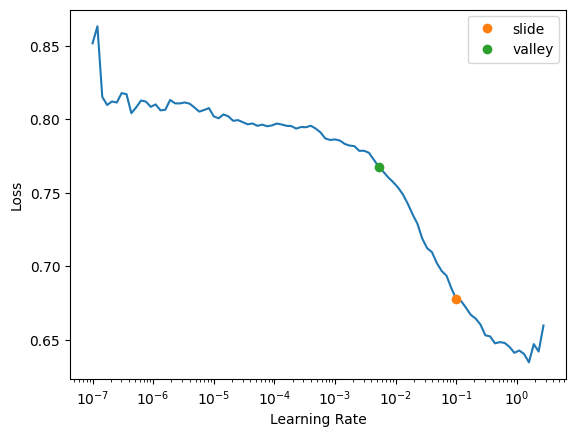

In [130]:
learn.lr_find(suggest_funcs=(slide, valley))

In [131]:
learn.fit(9, lr=0.03)

epoch,train_loss,valid_loss,accuracy,time
0,0.549101,0.565605,0.674157,00:00
1,0.526143,0.489220,0.741573,00:00
2,0.484029,0.405916,0.825843,00:00
3,0.466439,0.429882,0.825843,00:00
4,0.439236,0.415953,0.814607,00:00
5,0.428875,0.418967,0.814607,00:00
6,0.417074,0.435548,0.837079,00:00
7,0.406988,0.479728,0.814607,00:00
8,0.405268,0.420735,0.825843,00:00


In [132]:
def test():
  tst_df = pd.read_csv(path/'test.csv')
  tst_df['Fare'] = tst_df.Fare.fillna(0)
  add_features(tst_df)
  tst_dl = learn.dls.test_dl(tst_df)
  preds,_ = learn.get_preds(dl=tst_dl)
  tst_df['Survived'] = (preds[:,1]>0.5).int()
  sub_df = tst_df[['PassengerId','Survived']]
  sub_df.to_csv('sub.csv', index=False)

In [133]:
test()

/usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)
